In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
data = pd.read_csv('/content/FeatureEngineering - Sheet1.csv',
                   parse_dates=['DepartureTime', 'ArrivalTime'],
                   infer_datetime_format=True)

# Inspect your data (Column names will reflect the new ones)
print(data.head())
print(data.info())
print(data.describe())
print(data.isna().sum())

        MMSI       DepartureTime      LATd      LONd         ArrivalTime  \
0  205366000 2017-11-26 19:51:00  57.40660  21.53463 2017-11-26 19:51:00   
1  205366000 2017-11-27 13:18:00  57.40660  21.53437 2017-12-28 13:57:00   
2  205366000 2018-06-02 07:38:00  54.16003  12.14130 2018-06-03 05:43:00   
3  205366000 2018-06-03 12:16:00  57.59602  11.69184 2018-06-08 05:43:00   
4  205366000 2018-09-15 08:27:00  59.42259  27.72447 2018-10-01 15:16:00   

       LATa      LONa  AVGSPDkmph  DistanceKm  VesselType  Length  Width  \
0  57.40660  21.53463       28.65   723.43028        80.0   143.0   21.0   
1  54.16002  12.14124        2.73  2030.43443        80.0   143.0   21.0   
2  57.59724  11.69437       21.09   465.67234        80.0   143.0   21.0   
3  54.16005  12.14124        5.49   622.78374        80.0   143.0   21.0   
4  54.16008  12.14128        6.03  2356.37863        80.0   143.0   21.0   

   Draft  
0    8.2  
1    8.2  
2    8.2  
3    8.2  
4    8.2  
<class 'pandas.core.

<ipython-input-12-566676f07823>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv('/content/FeatureEngineering - Sheet1.csv',


In [ ]:
# Handle missing values (choose appropriate strategy)
data.fillna(method='ffill', inplace=True)

# Convert datetimes, calculate duration, and extract features
data['DepartureTime'] = pd.to_datetime(data['DepartureTime'], format="%Y-%m-%d %H:%M:%S")
data['ArrivalTime'] = pd.to_datetime(data['ArrivalTime'], format="%Y-%m-%d %H:%M:%S")
data['TravelTime'] = data['ArrivalTime'] - data['DepartureTime']
data['TravelTime_seconds'] = data['TravelTime'].dt.total_seconds()
data['DepartureHour'] = data['DepartureTime'].dt.hour

In [ ]:
X = data[['LATd', 'LONd', 'LATa', 'LONa', 'AVGSPDkmph', 'DistanceKm', 'DepartureHour', 'VesselType', 'Length', 'Width', 'Draft']]
y = data['TravelTime_seconds']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initial model
lgb_model = lgb.LGBMRegressor()

# Hyperparameter tuning
param_grid = {
    'num_leaves': [20, 50, 100],
    'max_depth': [5, 8, 12],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200]
}

grid_search = GridSearchCV(lgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
best_params = grid_search.best_params_
lgb_model = lgb.LGBMRegressor(**best_params)
lgb_model.fit(X_train, y_train)

y_pred = lgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (Unix timestamps):", mae)
print("Mean Squared Error (Unix timestamps):", mse)
print("R-squared:", r2)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1515
[LightGBM] [Info] Number of data points in the train set: 1000, number of used features: 11
[LightGBM] [Info] Start training from score 252370.920000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

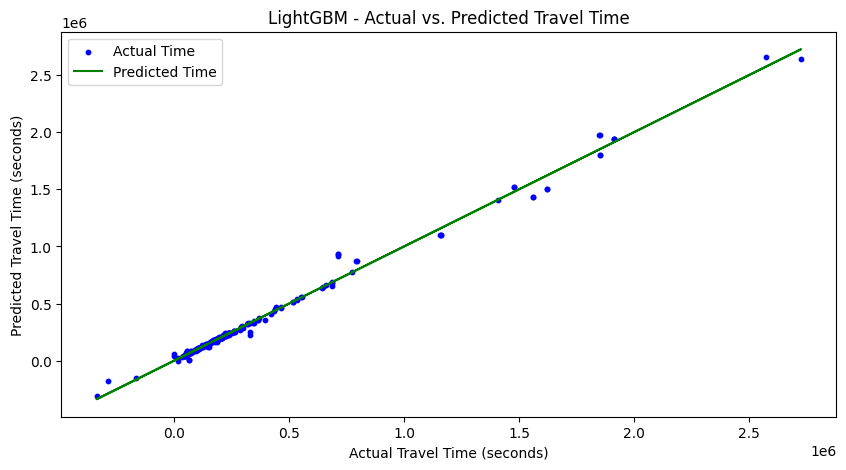

In [ ]:
# Visualization
plt.figure(figsize=(10, 5))

# Scatter plot with custom colors
plt.scatter(y_test, y_pred, s=10, c='blue', label='Actual Time')
plt.plot(y_test, y_test, color='green', label='Predicted Time')

plt.xlabel('Actual Travel Time (seconds)')
plt.ylabel('Predicted Travel Time (seconds)')
plt.title('LightGBM - Actual vs. Predicted Travel Time')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import cross_validate

# Define the scoring metrics
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

# Perform cross-validation for MAE, MSE, and R2
cv_results = cross_validate(lgb_model, X_train, y_train, cv=5, scoring=scoring)

# Extract cross-validation scores for each metric
cv_mse = -cv_results['test_neg_mean_squared_error'].mean()  # MSE
cv_mae = -cv_results['test_neg_mean_absolute_error'].mean()  # MAE
cv_r2 = cv_results['test_r2'].mean()  # R-squared

print("Cross-Validation Mean Squared Error:", cv_mse)
print("Cross-Validation Mean Absolute Error:", cv_mae)
print("Cross-Validation R-squared (R2):", cv_r2)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1313
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 11
[LightGBM] [Info] Start training from score 255416.025000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1515
[LightGBM] [Info] Number of data points in the train set: 1000, number of used features: 11
[LightGBM] [Info] Start training from score 252370.920000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

<Figure size 1000x600 with 0 Axes>

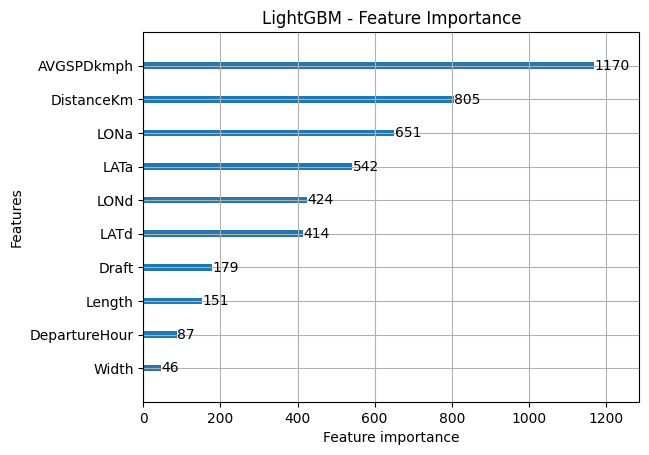

In [ ]:
import lightgbm as lgb

# Train the model
lgb_model.fit(X_train, y_train)

# Plot feature importance
plt.figure(figsize=(10, 6))
lgb.plot_importance(lgb_model, max_num_features=10)  # Adjust max_num_features as needed
plt.title("LightGBM - Feature Importance")
plt.show()